In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
df=pd.read_csv("MCI_data2014_2019_version2.csv")

In [4]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,severe,target,month,day,premise_type
0,-8.816401e+06,5.434587e+06,701,GO-20141756319,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,1430,100,Assault,2014,March,24,83,Monday,3,2014,March,24,83,Monday,1,Assault,D42,132,Malvern,-79.199081,43.800281,1,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,1,0,0,0,0
1,-8.837252e+06,5.413357e+06,901,GO-20143006885,2014/09/27 00:00:00+00,2014/09/29 00:00:00+00,Other,2120,200,B&E,2014,September,29,272,Monday,10,2014,September,27,270,Saturday,16,Break and Enter,D52,76,Bay Street Corridor,-79.386383,43.662472,2,56.2,10.2,12.6,25797,17505,0.678567,56526,14097,0,1,1,1,1
2,-8.862433e+06,5.422276e+06,702,GO-20141756802,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,2120,200,B&E,2014,March,24,83,Monday,7,2014,March,24,83,Monday,6,Break and Enter,D23,1,West Humber-Clairville,-79.612595,43.720406,3,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,0,1,0,0,0
3,-8.833104e+06,5.431887e+06,703,GO-20141760570,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Apartment,2120,200,B&E,2014,March,24,83,Monday,23,2014,March,24,83,Monday,15,Break and Enter,D33,47,Don Valley Village,-79.349121,43.782772,4,55.1,9.6,15.8,27051,15035,0.555802,37379,6441,0,1,0,0,2
4,-8.845311e+06,5.413667e+06,902,GO-20142004859,2014/05/03 00:00:00+00,2014/05/03 00:00:00+00,Commercial,1610,210,Robbery - Business,2014,May,3,123,Saturday,2,2014,May,3,123,Saturday,2,Robbery,D11,90,Junction Area,-79.458778,43.664490,5,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,1,2,2,1,0


In [5]:
df.drop(['X','Y','Index_','event_unique_id','occurrencedate','premisetype','ucr_code','ucr_ext','offence','reportedyear','reportedmonth','reportedday'], axis=1,inplace=True)

In [6]:
df.drop(['reporteddate','reporteddayofyear','reporteddayofweek','reportedhour','occurrencemonth','occurrencedayofweek','MCI','Division','Neighbourhood','ObjectId'], axis=1,inplace=True)

In [7]:
df.drop(['target'], axis=1,inplace=True)

In [8]:
df

,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,severe,month,day,premise_type
0,2014,24,83,1,132,-79.199081,43.800281,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,1,0,0,0
1,2014,27,270,16,76,-79.386383,43.662472,56.2,10.2,12.6,25797,17505,0.678567,56526,14097,0,1,1,1
2,2014,24,83,6,1,-79.612595,43.720406,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,0,0,0,0
3,2014,24,83,15,47,-79.349121,43.782772,55.1,9.6,15.8,27051,15035,0.555802,37379,6441,0,0,0,2
4,2014,3,123,2,90,-79.458778,43.664490,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205316,2019,24,358,4,1,-79.611320,43.710690,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,0,11,5,4
205317,2019,24,358,16,14,-79.556908,43.610126,63.6,7.3,10.7,43965,24535,0.558058,52787,2712,0,11,5,4
205318,2019,24,358,19,74,-79.375420,43.671280,60.4,10.4,22.8,18615,10230,0.549557,32648,44321,0,11,5,4
205319,2019,24,358,0,30,-79.497994,43.700653,57.1,10.0,22.0,17757,5925,0.333671,32483,5045,0,11,5,1


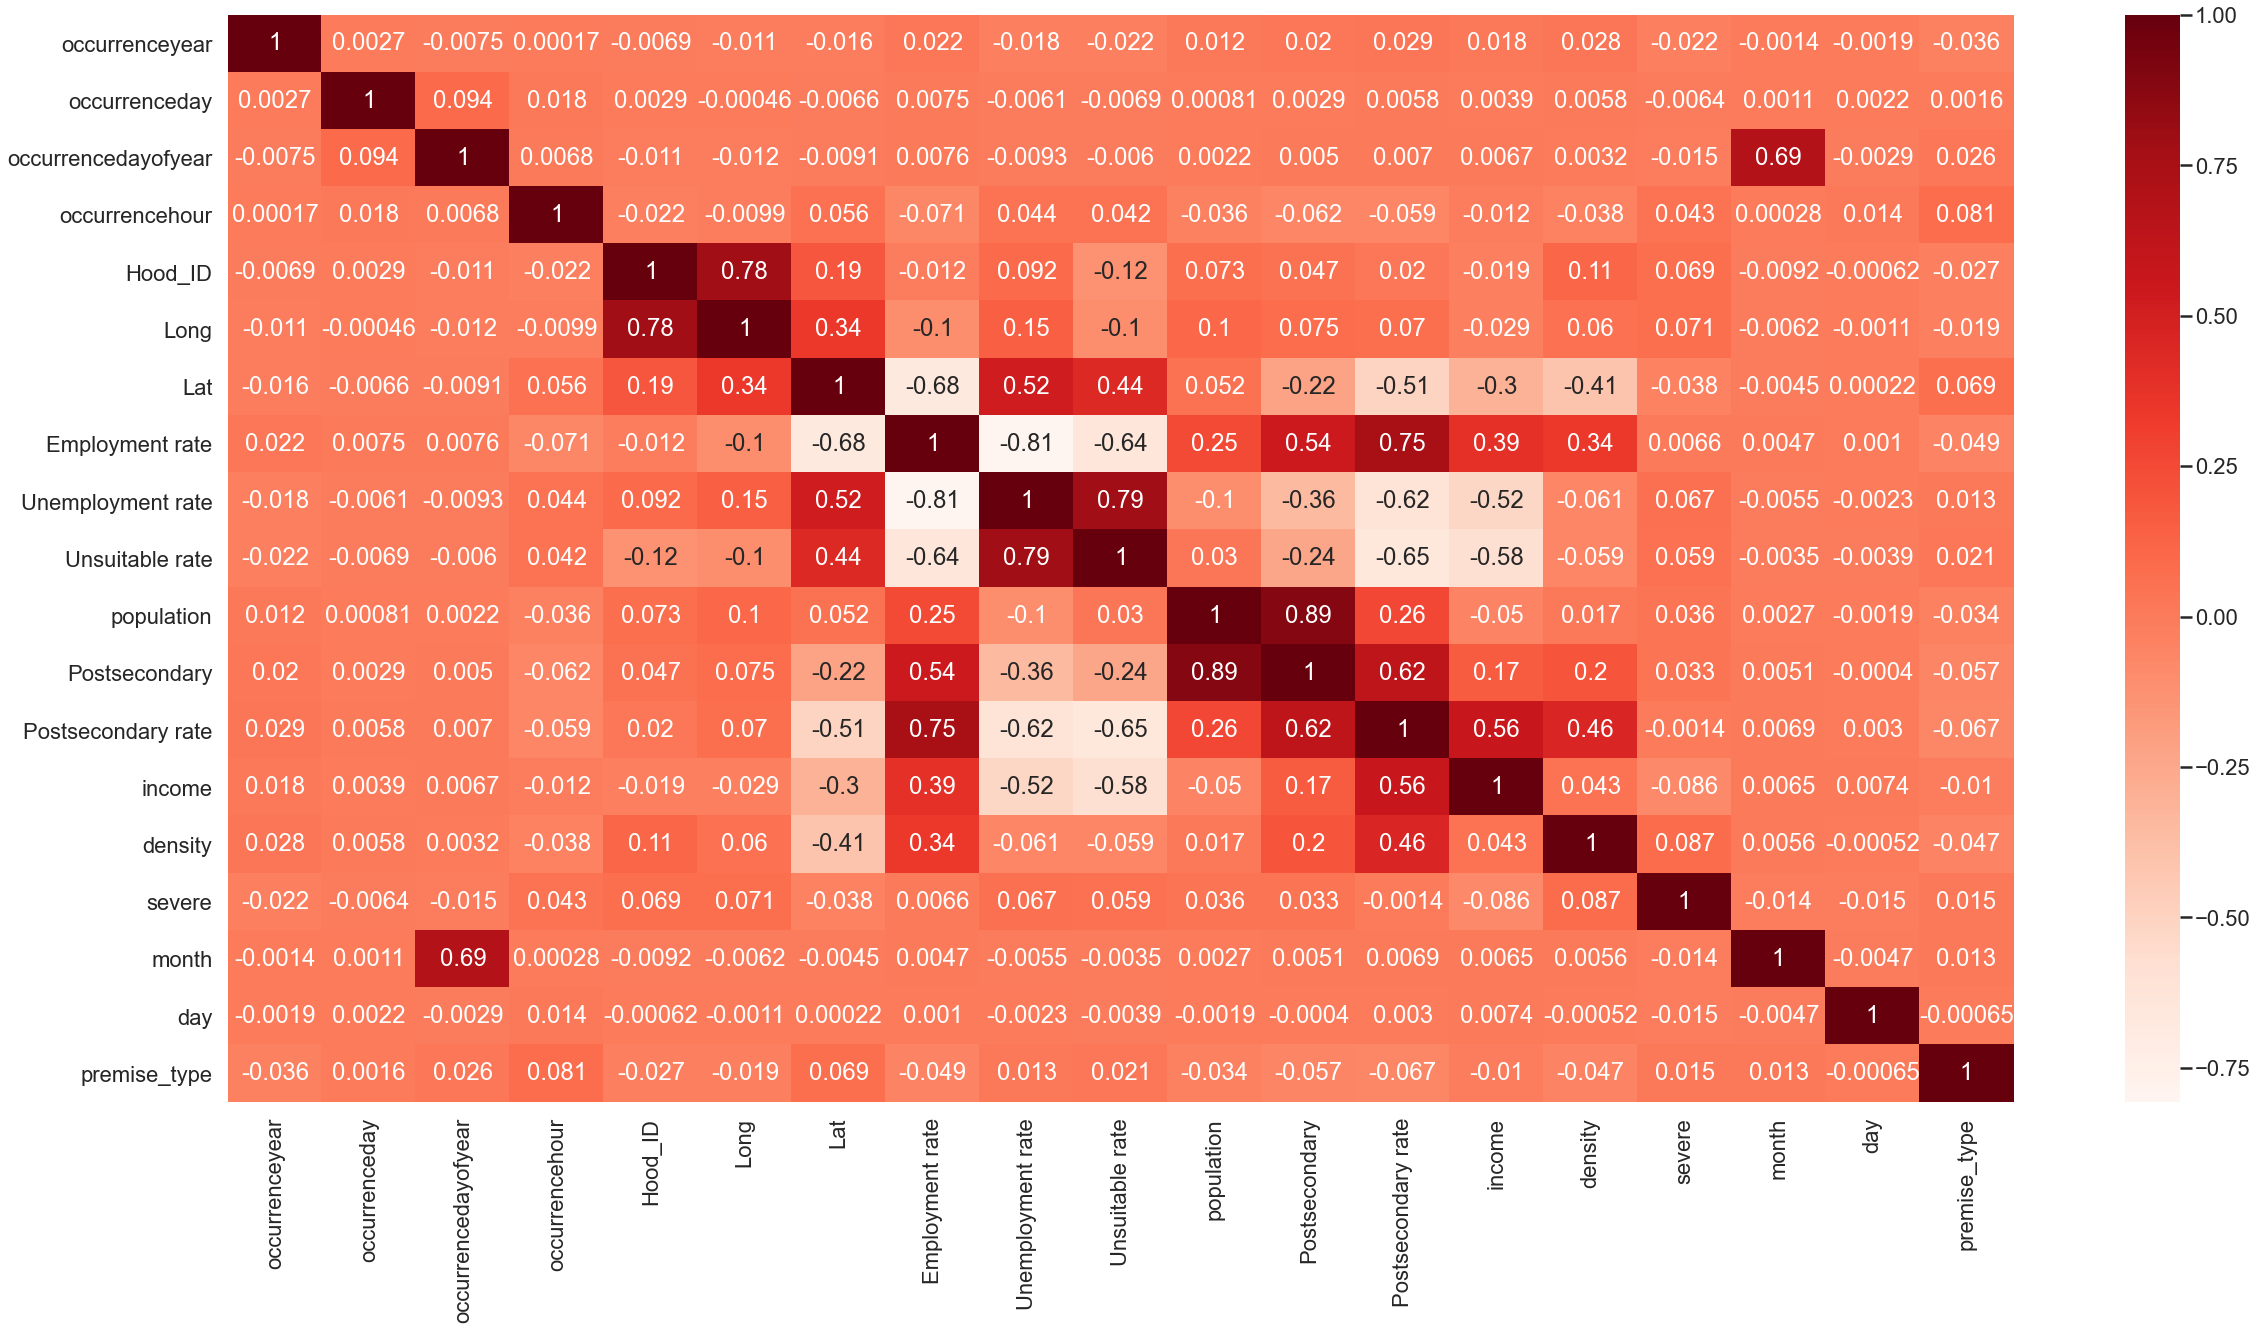

In [9]:
#Using Pearson Correlation
plt.figure(figsize=(40,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
X= df.drop(['severe'],axis = 1).values

In [12]:
y = df['severe'].values

### feature selection

#### Recursive Feature Elimination

In [15]:
from sklearn import tree
from sklearn.feature_selection import RFE
model = tree.DecisionTreeClassifier()
rfe = RFE(model, 16)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\ketao\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=16 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Num Features: 16
Selected Features: [ True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1]


#### Feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.07514333 0.09955348 0.10194223 0.11402251 0.01475681 0.11672759
 0.11565578 0.01075627 0.01229054 0.01044473 0.00930637 0.00978005
 0.01366529 0.01453673 0.01344185 0.07777378 0.0846667  0.10553596]


population and Postsecondary are the least important feature.

In [10]:
df.to_csv("MCI_data2014_2019_binaryclass.csv", index = False)